In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Create sample dataset
data = {
    'StudyHours': [5, 2, 3, 8, 1, 4, 6],
    'Attendance': [90, 60, 75, 95, 50, 80, 85],
    'PreviousScore': [80, 50, 60, 85, 40, 70, 78],
    'FinalScore': [85, 55, 65, 90, 45, 75, 80]
}

df = pd.DataFrame(data)
df


,StudyHours,Attendance,PreviousScore,FinalScore
0,5,90,80,85
1,2,60,50,55
2,3,75,60,65
3,8,95,85,90
4,1,50,40,45
5,4,80,70,75
6,6,85,78,80


In [3]:
# Check for missing data
print(df.isnull().sum())


StudyHours       0
Attendance       0
PreviousScore    0
FinalScore       0
dtype: int64


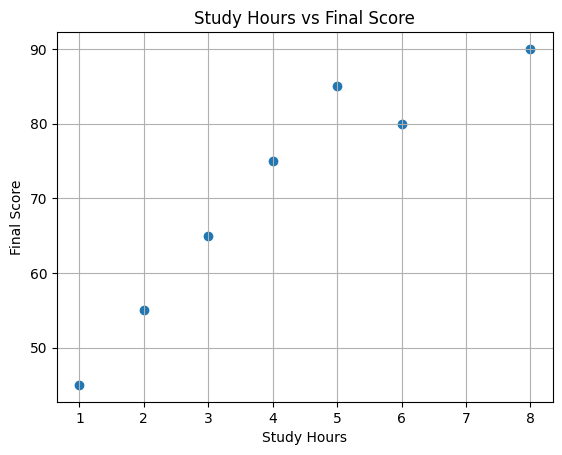

In [4]:
# Visualize Study Hours vs Final Score
plt.scatter(df['StudyHours'], df['FinalScore'])
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Study Hours vs Final Score')
plt.grid(True)
plt.show()


In [5]:
X = df[['StudyHours', 'Attendance', 'PreviousScore']]
y = df['FinalScore']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Create Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict
y_pred = model.predict(X_test)

# Show predictions
print("Actual:", y_test.values)
print("Predicted:", y_pred)


Actual: [85 55 75]
Predicted: [80.77464789 53.94366197 71.83098592]


In [8]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 9.67
R-squared: 0.94


In [10]:
# Predict for a new student using a DataFrame (to match feature names)
new_student = pd.DataFrame({
    'StudyHours': [6],
    'Attendance': [85],
    'PreviousScore': [75]
})

predicted_score = model.predict(new_student)

print(f"Predicted Final Score: {predicted_score[0]:.2f}")


Predicted Final Score: 79.15
